In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import numpy as np
import pandas as pd;
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train=pd.read_csv('../input/titanic/train.csv')
test=pd.read_csv('../input/titanic/test.csv')
train_=len(train)
print(train_)

891


In [4]:
titanic=pd.concat([train,test],ignore_index='True')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [6]:
titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

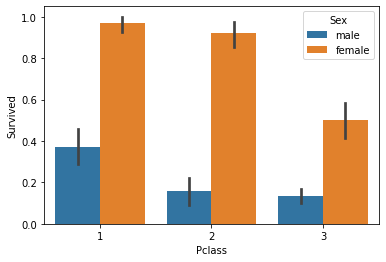

In [7]:
sns.barplot(data=titanic,x='Pclass',y='Survived',hue='Sex')


In [8]:
titanic['Sex']=titanic['Sex'].apply({'male':0,'female':1}.get)

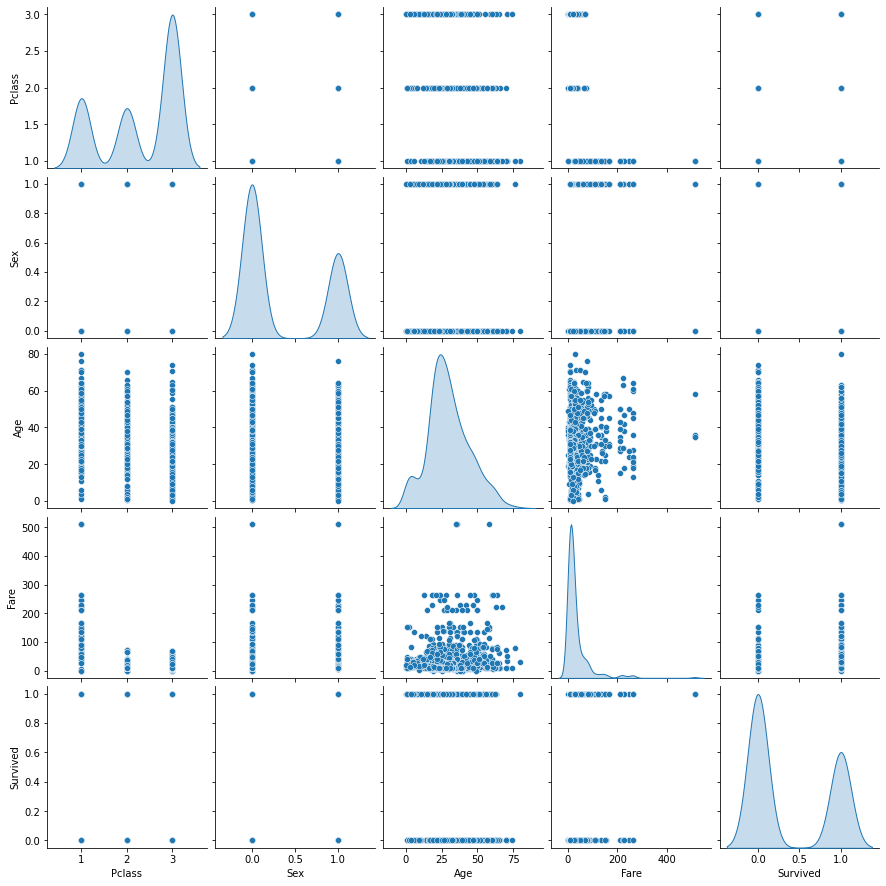

In [9]:
sns.pairplot(titanic,
           x_vars=['Pclass','Sex','Age','Fare','Survived'],
           y_vars=['Pclass','Sex','Age','Fare','Survived'],
           diag_kind='kde')

Text(0.5, 1.0, 'Missing Values Heatmap')

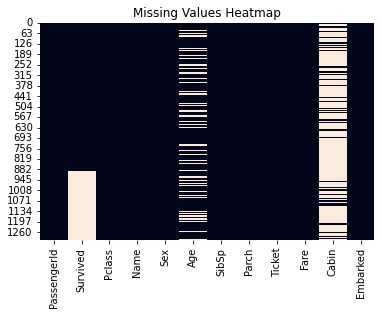

In [10]:
sns.heatmap(titanic.isnull(),cbar=False).set_title("Missing Values Heatmap")

In [11]:
titanic.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

In [12]:
titanic.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,0.355997,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,0.478997,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [13]:
titanic.groupby(['Cabin','Survived'])['Pclass'].sum()

Cabin  Survived
A10    0.0         1
A14    0.0         1
A16    1.0         1
A19    0.0         1
A20    1.0         1
                  ..
F38    0.0         3
F4     1.0         4
G6     0.0         6
       1.0         6
T      0.0         1
Name: Pclass, Length: 163, dtype: int64

In [14]:
titanic['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [15]:
titanic['Cabin']=titanic['Cabin'].replace(np.nan,'N')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,N,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,N,S
1307,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,N,S


In [16]:
titanic['Deck']=titanic['Cabin'].str[:1]
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,N,S,N
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,N,S,N
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,C
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,N,S,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,N,S,N
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,N,S,N
1307,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,N,S,N


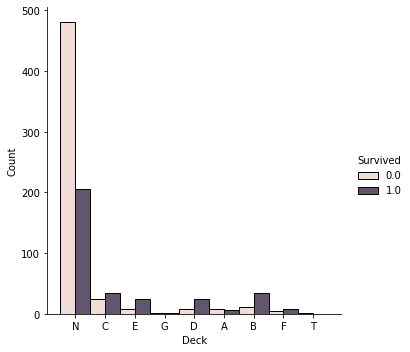

In [17]:
sns.displot(titanic,x='Deck',hue='Survived',multiple='dodge')

In [18]:
titanic['Deck'].value_counts().sort_values(ascending=False)

N    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Deck, dtype: int64

In [19]:
titanic.groupby(['Deck','Pclass']).count()


PassengerId  Survived  Name  Sex  Age  SibSp  Parch  Ticket  \
Deck Pclass                                                                
A    1                22        15    22   22   19     22     22      22   
B    1                65        47    65   65   63     65     65      65   
C    1                94        59    94   94   86     94     94      94   
D    1                40        29    40   40   37     40     40      40   
     2                 6         4     6    6    5      6      6       6   
E    1                34        25    34   34   32     34     34      34   
     2                 4         4     4    4    3      4      4       4   
     3                 3         3     3    3    3      3      3       3   
F    2                13         8    13   13   13     13     13      13   
     3                 8         5     8    8    5      8      8       8   
G    3                 5         4     5    5    5      5      5       5   
N    1                67        40    67   67   46     67     67      67   
     2               254       168   254  254  240    254    254     254   
     3               693       479   693  693  488    693    693     693   
T    1                 1         1     1    1    1      1      1       1   

             Fare  Cabin  Embarked  
Deck Pclass                         
A    1         22     22        22  
B    1         65     65        63  
C    1         94     94        94  
D    1         40     40        40  
     2          6      6         6  
E    1         34     34        34  
     2          4      4         4  
     3          3      3         3  
F    2         13     13        13  
     3          8      8         8  
G    3          5      5         5  
N    1         67     67        67  
     2        254    254       254  
     3        692    693       693  
T    1          1      1         1

In [20]:
titanic.groupby(['Pclass','Sex','Embarked'])['Age'].mean()


Pclass  Sex  Embarked
1       0    C           40.047619
             Q           44.000000
             S           41.705977
        1    C           38.107692
             Q           35.000000
             S           35.609375
2       0    C           27.269231
             Q           53.750000
             S           30.491702
        1    C           19.363636
             Q           30.000000
             S           28.455165
3       0    C           24.129474
             Q           26.738095
             S           26.146241
        1    C           16.818182
             Q           24.333333
             S           22.854771
Name: Age, dtype: float64

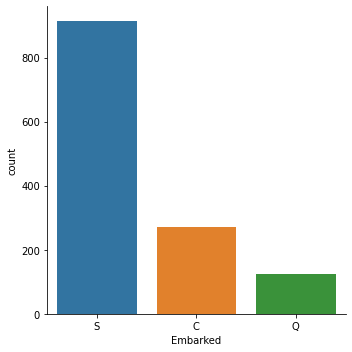

In [21]:
sns.catplot(data=titanic,x='Embarked',kind='count')


In [22]:
titanic[titanic['Embarked'].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
61,62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN,B
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN,B


In [23]:
titanic['Embarked'].fillna('S',inplace=True)
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
1304,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,N,S,N
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,N,S,N
1307,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,N,S,N
1308,1309,NaN,3,"Peter, Master. Michael J",0,NaN,1,1,2668,22.3583,N,C,N


In [24]:
titanic[titanic['Fare'].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
1043,1044,NaN,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,N,S,N


In [25]:
k=titanic.groupby(['Pclass'])['Fare'].mean()
titanic['Fare']=titanic['Fare'].replace(np.nan,k[3])

In [26]:
titanic.groupby(['Embarked','Sex','Pclass'])['Age'].mean()

Embarked  Sex  Pclass
C         0    1         40.047619
               2         27.269231
               3         24.129474
          1    1         38.107692
               2         19.363636
               3         16.818182
Q         0    1         44.000000
               2         53.750000
               3         26.738095
          1    1         35.000000
               2         30.000000
               3         24.333333
S         0    1         41.705977
               2         30.491702
               3         26.146241
          1    1         36.045455
               2         28.455165
               3         22.854771
Name: Age, dtype: float64

In [27]:
titanic['Age']=titanic['Age'].fillna(titanic.groupby(['Embarked','Sex','Pclass'])['Age'].transform('mean'))

In [28]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Deck         1309 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


In [29]:
titanic['Name_pre']=titanic["Name"].apply(lambda x: x.split(',')[1].split('.')[0].strip())


In [30]:
print(titanic['Name_pre'].value_counts())

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Name_pre, dtype: int64


In [31]:
#Reducing the Name prefix
titanic['Name_pre'] = titanic['Name_pre'].apply({
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Mrs': 'Mrs',
    'Master': 'Master',
    'Dr': 'Dr',
    'Rev': 'Rev',
    'Don': 'Royalty',
    'Col': 'Officer',
    'Jonkheer': 'Mr',
    'Major': 'Officer',
    'Ms': 'Miss',
    'Mlle': 'Miss',
    'the Countess': 'Royalty',
    'Capt': 'Officer',
    'Dona': 'Royalty',
    'Lady': 'Royalty',
    'Sir': 'Mr',
    #'Mme': 'Mrs',
}.get)
titanic['Name_pre'].value_counts()

Mr         759
Miss       264
Mrs        197
Master      61
Rev          8
Dr           8
Officer      7
Royalty      4
Name: Name_pre, dtype: int64

In [32]:
titanic['Family']=titanic['SibSp']+titanic['Parch']+1


In [33]:
titanic.drop(['Name','SibSp','Parch','Ticket','Cabin','Deck'],axis=1,inplace=True)


In [34]:
#Making the dummy variables of the certains columns
emb = pd.get_dummies(titanic['Embarked'], prefix='Embarked')
titl = pd.get_dummies(titanic['Name_pre'], prefix='Name_pre')
sex = pd.get_dummies(titanic['Sex'], prefix='Sex')
#deck=pd.get_dummies(titanic['Deck'], prefix='Deck')
#age = pd.get_dummies(titanic['Age-range'], prefix='age')

# Concatenating dummy variables to dataframe
titanic = pd.concat([titanic, emb,titl, sex], axis=1)

# Droping intial variables
titanic.drop(['Embarked','Name_pre', 'Sex'], axis=1, inplace=True)


In [35]:
train=titanic.loc[:train_-1, :]


In [36]:
test=titanic.loc[train_:, :]
test=test.drop('Survived',axis=1)

In [37]:
train_x=train.drop('Survived',axis=1)
train_y=train['Survived']

In [38]:
#Splitting the train and test dataset and applying the machine learning algorithms
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(train_x,train_y,test_size=0.2,random_state=0)

In [39]:
from sklearn.ensemble import RandomForestClassifier
scores={}
for i in range(1,8):
    model=RandomForestClassifier(n_estimators=200*i,random_state=0)
    model.fit(X_train,Y_train)
    score=model.score(X_test,Y_test)
    scores[200*i]=score
print('Score for diffrent values of n_estimators')
for i,j in scores.items():
    print(i, ' : ', j)

Score for diffrent values of n_estimators
200  :  0.8547486033519553
400  :  0.8547486033519553
600  :  0.8603351955307262
800  :  0.8603351955307262
1000  :  0.8603351955307262
1200  :  0.8547486033519553
1400  :  0.8547486033519553


In [40]:
model_=RandomForestClassifier(n_estimators=1000,random_state=0)
model_.fit(train_x,train_y)
prediction=model_.predict(test)

In [41]:
submit=pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':prediction})
submit['Survived']=submit['Survived'].astype('int')
submit.reset_index(inplace=True)
submit=submit.drop('index',axis=1)
submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [42]:
submit.to_csv('titanic_submit.csv',index=False)